In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn import preprocessing
%matplotlib inline

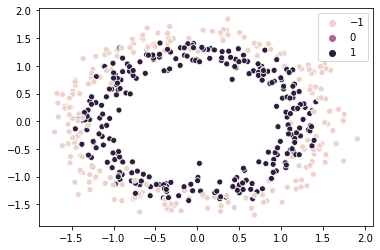

In [98]:
x, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)
x, y = make_circles(n_samples=1000, noise=0.09)
x = preprocessing.scale(x)


x_test=x[:500]
y_test=y[:500]
x=x[500:]
y=y[500:]
y=np.where(y==0,-1,1)
sns.scatterplot(x[:,0],x[:,1],hue=y.reshape(-1))

In [62]:
 class support_vector_machine:
    def __init__(self,C=1,features=2,sigma_sq=1,kernel="None"):
        self.C=C
        self.features=features
        self.sigma_sq=sigma_sq
        self.kernel=kernel
        self.weights=np.zeros(features)
        self.bias=0.
        
    def __similarity(self,x,l):
        return np.exp(-sum((x-l)**2)/(2*self.sigma_sq))

    def gaussian_kernel(self,x):
        m=x.shape[0]
        op=[[self.__similarity(x[x_index],x[l_index]) for l_index in range(m)] for x_index in range(m)]
        return np.array(op)

    def loss_function(self,y,y_hat):
        sum_terms=1-y*y_hat
        sum_terms=np.where(sum_terms<0,0,sum_terms)
        return (self.C*np.sum(sum_terms)/len(y)+sum(self.weights**2)/2)

    def fit(self,x_train,y_train,epochs=1000,print_every_nth_epoch=100,learning_rate=0.01):
        y=y_train.copy()
        x=x_train.copy()
        assert x.shape[0]==y.shape[0] , "Samples of x and y don't match."
        assert x.shape[1]==self.features , "Number of Features don't match"
        if(self.kernel=="gaussian"):
            x=self.gaussian_kernel(x)
            # print(y)
            m=x.shape[0]
            self.weights=np.zeros(m)
            sns.scatterplot(x[0,:],x[1,:],hue=y.reshape(-1))
            plt.show()
        n=x.shape[0]
        for epoch in range(epochs):
            y_hat=np.dot(x,self.weights)+self.bias
            grad_weights=(-self.C*np.multiply(y,x.T).T+self.weights).T
            for weight in range(self.weights.shape[0]):
                grad_weights[weight]=np.where(1-y_hat<=0,self.weights[weight],grad_weights[weight])
            grad_weights=np.sum(grad_weights,axis=1)
            # if((epoch+1)%print_every_nth_epoch==0):
            #     print(grad_weights)
            self.weights-=learning_rate*grad_weights/n
            grad_bias=-y*self.bias
            grad_bias=np.where(1-y_hat<=0,0,grad_bias)
            grad_bias=sum(grad_bias)
            self.bias-=grad_bias*learning_rate/n
            if((epoch+1)%print_every_nth_epoch==0):
                print("--------------- Epoch {} --> Loss = {} ---------------".format(epoch+1, self.loss_function(y,y_hat)))
    def evaluate(self,x,y):
        pred=self.predict(x)
        pred=np.where(pred>0,1,0)
        diff=np.abs(y-pred)
        return((len(diff)-sum(diff))/len(diff))
    def predict(self,x):
        if(self.kernel=="gaussian"):
            x=self.gaussian_kernel(x)
        return np.dot(x,self.weights)+self.bias
        
            

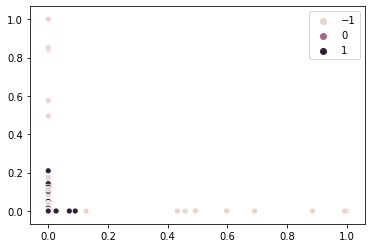

--------------- Epoch 1 --> Loss = 10.00016301265558 ---------------
--------------- Epoch 2 --> Loss = 9.968043015301282 ---------------
--------------- Epoch 3 --> Loss = 9.936558978243756 ---------------
--------------- Epoch 4 --> Loss = 9.9056982781496 ---------------
--------------- Epoch 5 --> Loss = 9.875448542566982 ---------------
--------------- Epoch 6 --> Loss = 9.845797644936328 ---------------
--------------- Epoch 7 --> Loss = 9.816733699700253 ---------------
--------------- Epoch 8 --> Loss = 9.788245057510792 ---------------
--------------- Epoch 9 --> Loss = 9.76032030053195 ---------------
--------------- Epoch 10 --> Loss = 9.732948237835725 ---------------
--------------- Epoch 11 --> Loss = 9.706117900889707 ---------------
--------------- Epoch 12 --> Loss = 9.679818539134441 ---------------
--------------- Epoch 13 --> Loss = 9.654039615648776 ---------------
--------------- Epoch 14 --> Loss = 9.628770802901437 ---------------
--------------- Epoch 15 --> Los

In [99]:
model=support_vector_machine(C=10,kernel="gaussian",sigma_sq=0.01)
model.fit(x,y,epochs=20,print_every_nth_epoch=1,learning_rate=0.01)
# print(y)
# # print(np.where(model.predict(x)<0,-1,1))
# print(model.evaluate(x,y))
yy=np.where(y==-1,0,1)
# print(model.predict(x))
yp=np.where(model.predict(x)<0,0,1)
print(yy)
print(yp)
yy=sum(abs(yy-yp))
print(yy)
print((len(y)-yy)/len(y))


In [67]:
print(model.weights)
def visualize(model,title):
    print("accuracy = {}".format(model.evaluate(x_test,y_test)))
    x1=np.arange(-5,6,0.5)
    x2=np.arange(-5,4,0.5)
    for i in range(len(x1)):
        for j in range(len(x2)):
            pred=model.predict(np.array([np.array(np.array([x1[i],x2[j]]))]))[0]
            if(pred>0.5):
                plt.scatter(x1[i],x2[j],c="r")
            else:
                plt.scatter(x1[i],x2[j],c="b")
    plt.title(title)
    plt.show()

[5.14526207e-05 2.63643955e-05 5.05690918e-05 5.14239887e-05
 2.59367238e-05 4.74097970e-05 5.08774808e-05 3.12955897e-05
 5.14997939e-05 2.75753295e-05 3.07063057e-05 3.90368318e-05
 5.14657953e-05 2.93897387e-05 3.19425868e-05 5.03332558e-05
 3.71799008e-05 4.46939806e-05 3.09599044e-05 3.00637048e-05
 3.56714720e-05 4.75809637e-05 3.34898623e-05 2.62169492e-05
 2.85231341e-05 5.12179181e-05 4.99889479e-05 3.16455202e-05
 3.94126047e-05 4.83998841e-05 4.27557078e-05 5.03333583e-05
 2.69783201e-05 3.03877868e-05 4.39403206e-05 2.81704644e-05
 3.78081007e-05 5.13640968e-05 4.64983821e-05 2.81441398e-05
 3.08900888e-05 4.49164201e-05 4.09637189e-05 4.86974419e-05
 2.82502270e-05 5.04542787e-05 4.81729769e-05 3.20617391e-05
 4.32688965e-05 3.08196551e-05 4.99348751e-05 3.37905445e-05
 3.82575347e-05 3.23381372e-05 3.71498721e-05 4.95646083e-05
 4.77684432e-05 3.50288783e-05 2.99430681e-05 4.69571922e-05
 3.08847899e-05 2.58500424e-05 4.91619044e-05 4.01627300e-05
 3.27790907e-05 4.900040

In [87]:
visualize(model,"sda")

accuracy = 0.486


ValueError: shapes (1,1) and (500,) not aligned: 1 (dim 1) != 500 (dim 0)

In [244]:
x=np.array([[1,2],[3,4],[5,6]])
y=np.array([1,0,1])

print(my_kernel(x,x))
model=support_vector_machine()
model.gaussian_kernel(x)

[[3.67879441e-01 6.73794700e-03 3.67879441e-01]
 [2.26032941e-06 1.38879439e-11 2.26032941e-06]
 [1.56288219e-18 3.22134029e-27 1.56288219e-18]]


array([[1.00000000e+00, 1.83156389e-02, 1.12535175e-07],
       [1.83156389e-02, 1.00000000e+00, 1.83156389e-02],
       [1.12535175e-07, 1.83156389e-02, 1.00000000e+00]])

In [15]:
z=np.array([[1,2],[7,8],[3,4]])
support_vector_machine().gaussian_kernel(z)

array([[1.00000000e+00, 2.31952283e-16, 1.83156389e-02],
       [2.31952283e-16, 1.00000000e+00, 1.12535175e-07],
       [1.83156389e-02, 1.12535175e-07, 1.00000000e+00]])

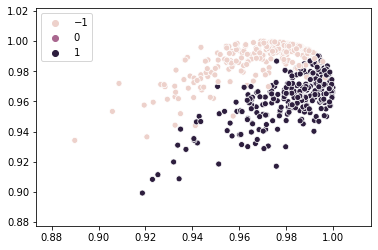

In [36]:
# xg=model.gaussian_kernel(x)
# xg
sns.scatterplot(xg[:,1],xg[:,0],y.reshape(-1))